# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

## Perform API Calls

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kelo
City not found. Skipping...
Processing Record 2 of Set 1 | busselton
City not found. Skipping...
Processing Record 3 of Set 1 | progreso
City not found. Skipping...
Processing Record 4 of Set 1 | brownsville
City not found. Skipping...
Processing Record 5 of Set 1 | ayagoz
City not found. Skipping...
Processing Record 6 of Set 1 | hambantota
City not found. Skipping...
Processing Record 7 of Set 1 | arraial do cabo
City not found. Skipping...
Processing Record 8 of Set 1 | woodward
City not found. Skipping...
Processing Record 9 of Set 1 | emerald
City not found. Skipping...
Processing Record 10 of Set 1 | qaanaaq
City not found. Skipping...
Processing Record 11 of Set 1 | longyearbyen
City not found. Skipping...
Processing Record 12 of Set 1 | butaritari
City not found. Skipping...
Processing Record 13 of Set 1 | tidore
City not found. Skipping...
Processing Record 14 of Set 1 | ushuaia
Cit

City not found. Skipping...
Processing Record 18 of Set 3 | jamestown
City not found. Skipping...
Processing Record 19 of Set 3 | samarai
City not found. Skipping...
Processing Record 20 of Set 3 | karratha
City not found. Skipping...
Processing Record 21 of Set 3 | urbano santos
City not found. Skipping...
Processing Record 22 of Set 3 | novopodrezkovo
City not found. Skipping...
Processing Record 23 of Set 3 | rehoboth
City not found. Skipping...
Processing Record 24 of Set 3 | chegdomyn
City not found. Skipping...
Processing Record 25 of Set 3 | port elizabeth
City not found. Skipping...
Processing Record 26 of Set 3 | taybad
City not found. Skipping...
Processing Record 27 of Set 3 | tiksi
City not found. Skipping...
Processing Record 28 of Set 3 | jaisalmer
City not found. Skipping...
Processing Record 29 of Set 3 | saint george
City not found. Skipping...
Processing Record 30 of Set 3 | richards bay
City not found. Skipping...
Processing Record 31 of Set 3 | tumannyy
City not fou

City not found. Skipping...
Processing Record 38 of Set 5 | hualmay
City not found. Skipping...
Processing Record 39 of Set 5 | kloulklubed
City not found. Skipping...
Processing Record 40 of Set 5 | quesnel
City not found. Skipping...
Processing Record 41 of Set 5 | toliary
City not found. Skipping...
Processing Record 42 of Set 5 | isangel
City not found. Skipping...
Processing Record 43 of Set 5 | avera
City not found. Skipping...
Processing Record 44 of Set 5 | meulaboh
City not found. Skipping...
Processing Record 45 of Set 5 | syracuse
City not found. Skipping...
Processing Record 46 of Set 5 | itoman
City not found. Skipping...
Processing Record 47 of Set 5 | digras
City not found. Skipping...
Processing Record 48 of Set 5 | nemuro
City not found. Skipping...
Processing Record 49 of Set 5 | alofi
City not found. Skipping...
Processing Record 0 of Set 6 | dikson
City not found. Skipping...
Processing Record 1 of Set 6 | saryg-sep
City not found. Skipping...
Processing Record 2 of

City not found. Skipping...
Processing Record 8 of Set 8 | mnogovershinnyy
City not found. Skipping...
Processing Record 9 of Set 8 | vila franca do campo
City not found. Skipping...
Processing Record 10 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 11 of Set 8 | saurimo
City not found. Skipping...
Processing Record 12 of Set 8 | yaan
City not found. Skipping...
Processing Record 13 of Set 8 | fornosovo
City not found. Skipping...
Processing Record 14 of Set 8 | upernavik
City not found. Skipping...
Processing Record 15 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 16 of Set 8 | zhuhai
City not found. Skipping...
Processing Record 17 of Set 8 | lavumisa
City not found. Skipping...
Processing Record 18 of Set 8 | cervo
City not found. Skipping...
Processing Record 19 of Set 8 | springbok
City not found. Skipping...
Processing Record 20 of Set 8 | morehead
City not found. Skipping...
Processing Record 21 of Set 8 | olinda
City not found. Skip

City not found. Skipping...
Processing Record 28 of Set 10 | sarangarh
City not found. Skipping...
Processing Record 29 of Set 10 | goundam
City not found. Skipping...
Processing Record 30 of Set 10 | wahiawa
City not found. Skipping...
Processing Record 31 of Set 10 | nagybaracska
City not found. Skipping...
Processing Record 32 of Set 10 | baykit
City not found. Skipping...
Processing Record 33 of Set 10 | pangkalanbuun
City not found. Skipping...
Processing Record 34 of Set 10 | turukhansk
City not found. Skipping...
Processing Record 35 of Set 10 | shumskiy
City not found. Skipping...
Processing Record 36 of Set 10 | victoria
City not found. Skipping...
Processing Record 37 of Set 10 | ambam
City not found. Skipping...
Processing Record 38 of Set 10 | katherine
City not found. Skipping...
Processing Record 39 of Set 10 | finschhafen
City not found. Skipping...
Processing Record 40 of Set 10 | gat
City not found. Skipping...
Processing Record 41 of Set 10 | tuatapere
City not found.

City not found. Skipping...
Processing Record 45 of Set 12 | danesti
City not found. Skipping...
Processing Record 46 of Set 12 | atar
City not found. Skipping...
Processing Record 47 of Set 12 | yichun
City not found. Skipping...
Processing Record 48 of Set 12 | gazojak
City not found. Skipping...
Processing Record 49 of Set 12 | surgut
City not found. Skipping...
Processing Record 0 of Set 13 | okhotsk
City not found. Skipping...
Processing Record 1 of Set 13 | saint-georges
City not found. Skipping...
Processing Record 2 of Set 13 | kampong thum
City not found. Skipping...
Processing Record 3 of Set 13 | the valley
City not found. Skipping...
Processing Record 4 of Set 13 | buin
City not found. Skipping...
Processing Record 5 of Set 13 | outjo
City not found. Skipping...
Processing Record 6 of Set 13 | correntina
City not found. Skipping...
Processing Record 7 of Set 13 | krasnokamensk
City not found. Skipping...
Processing Record 8 of Set 13 | bosaso
City not found. Skipping...
Pro

In [6]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

KeyError: 'Lat'

In [ ]:
# Display the City Data Frame
city_data_pd.head()

## Latitude vs. Temperature Plot

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

In [5]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

NameError: name 'wind_speed' is not defined

## Linear Regression

In [10]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

###  Max Temp vs. Latitude Linear Regression

The r-squared is: -0.5853423583562567


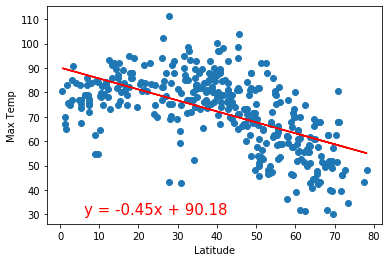

In [12]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-squared is: 0.8143387005204824


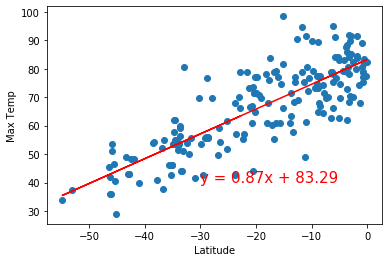

In [13]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))

The high r value indicates a strong positive correlation between latitude and max temperature.

### Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.014429876255081235


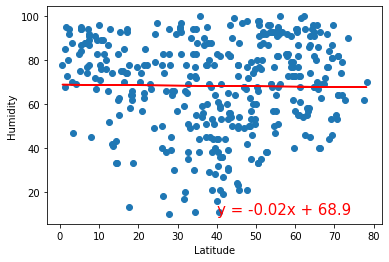

In [14]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-squared is: 0.005916369680637326


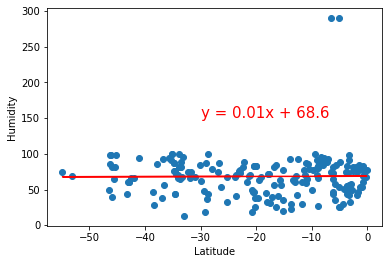

In [15]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.1045538185572658


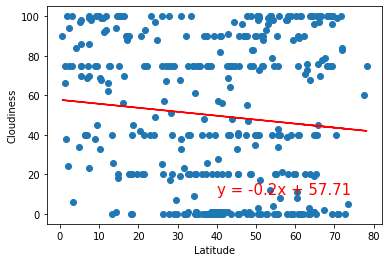

In [16]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-squared is: 0.13960563446090307


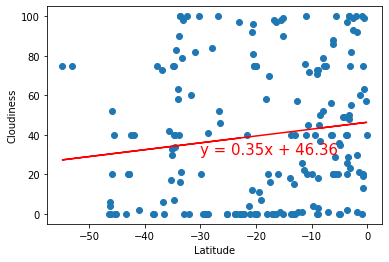

In [17]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.0674021505790306


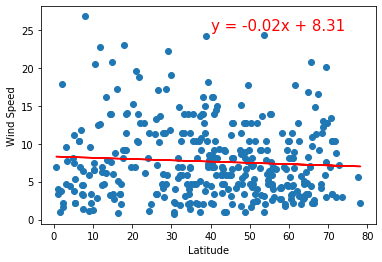

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-squared is: -0.08680688884832657


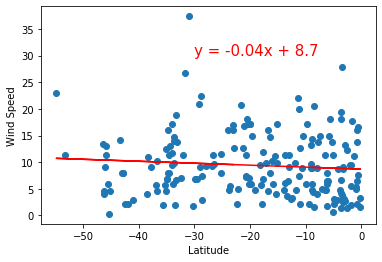

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))

The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.